#순환 신경망

Embedding 실습 예제) 단어 임베딩 실습

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import gensim.downloader as api

texts = ["You are the Best",
         "You are the Nice"]

tokenizer = Tokenizer(num_words = 10, oov_token = "<OOV>")
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

sequences = tokenizer.texts_to_sequences(texts)

binary_results = tokenizer.sequences_to_matrix(sequences, mode = "binary")

print("--------------------------------------")

print(f"sequences : {sequences}\n")
print(f"binary_vectors :\n {binary_results}\n")

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)
print(f'test sequences: {test_seq}')

for model_name, model_data in sorted(api.info()['models'].items()):
  print(
    '%s (%d records): %s' % (
    model_name,
    model_data.get('num_records', -1),
    model_data['description'][:40] + '...',
    )
  )
model = api.load("word2vec-google-news-300")

print(model.most_similar("cat"))
print(model.most_similar_cosmul(positive=['Seoul', 'France'], negative=['Paris']))
print(model.most_similar_cosmul(positive=['father','woman'], negative=['man']))
print(model.most_similar_cosmul(positive=['brother','woman'], negative=['man']))
print(model.most_similar_cosmul(positive=['soju','mexico'], negative=['korea']))
print(model.most_similar_cosmul(positive=['soju','russia'], negative=['korea']))

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------------------------
sequences : [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors :
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

test sequences: [[2, 3, 4, 1]]
__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-

Embedding - IMDB 예제)

(25000,) (25000,)
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
--------
1
1번째로 가장 많이 쓰인

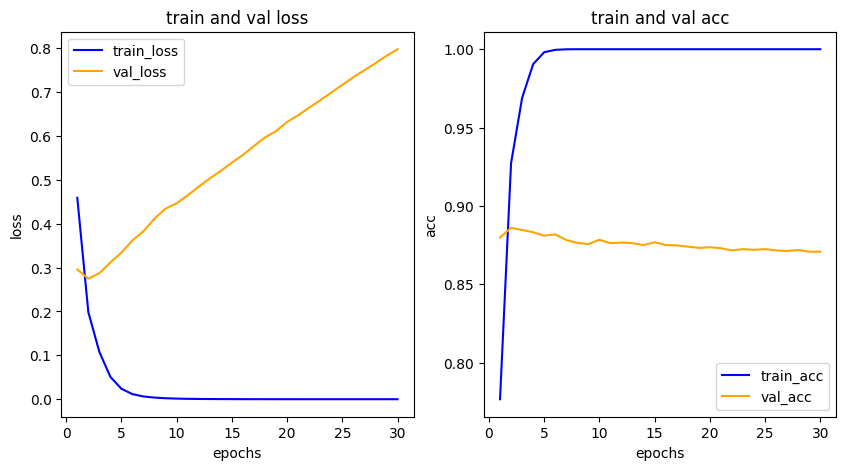

In [2]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
import matplotlib.pyplot as plt

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train[0])
print("--------")
print(y_train[0])

imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key
for i in range(1, 50):
  print("{}번째로 가장 많이 쓰인 단어 = {}".format(i, imdb_get_word_index[i]))

max_len = 500
print("Befor pad_sequences: ", len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = "pre")
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = "pre")

print("After pad_sequences: ", len(pad_x_train[0]))
print("pad_x_train: ", pad_x_train[0])

# # 모델 구성
model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()
history = model.fit(pad_x_train, y_train,
                    batch_size = 32,
                    epochs = 30,
                    validation_split = 0.2)

# # 모델 평가
model.evaluate(pad_x_test, y_test)

# # 손실, 정확도 그리기
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
acc = his_dict['acc']
val_acc = his_dict['val_acc']
# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()